In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_44cfe76e51eb443fa783aa0d3000b60d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F1pmI4kK2A7VehOmSwHkDVe42a52Bj9aovP7TPRkKjbz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_44cfe76e51eb443fa783aa0d3000b60d.get_object(Bucket='energypredictionofwindturbine-donotdelete-pr-2bgbsip7ddgpmy',Key='Turbine.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Time stamp,Power,WindSpeed,WindDirection,Pressure,Temp
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [3]:
df.columns
df.isnull().any()

Time stamp       False
Power            False
WindSpeed        False
WindDirection    False
Pressure         False
Temp             False
dtype: bool

<AxesSubplot:>

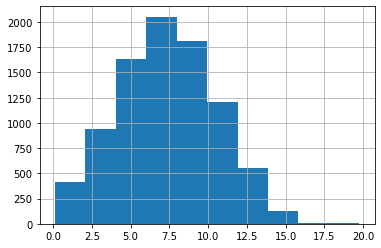

In [4]:
df['WindSpeed'].hist()

<AxesSubplot:>

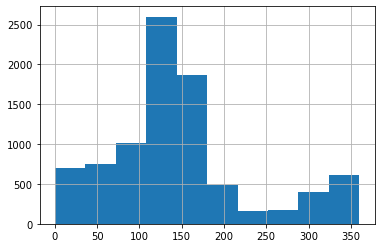

In [5]:
df['WindDirection'].hist()

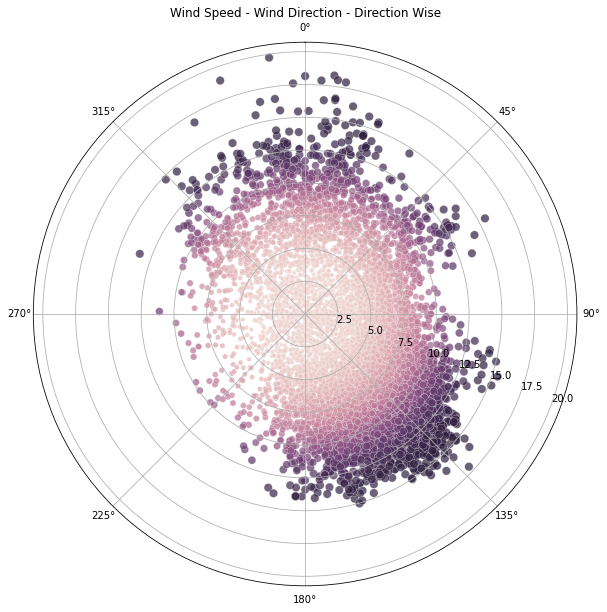

In [6]:
from math import radians

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

sns.scatterplot(x=[radians(x) for x in df['WindDirection']], 
                y=df['WindSpeed'],
                size=df['Power'],
                hue=df['Power'],
                alpha=0.7, legend=None)
# top represents the North 
ax.set_theta_zero_location('N')
# -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
ax.set_rlabel_position(110)
plt.title('Wind Speed - Wind Direction - Direction Wise')
plt.ylabel(None);

<AxesSubplot:>

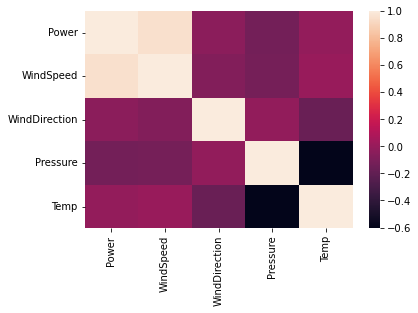

In [7]:
sns.heatmap(df.corr())

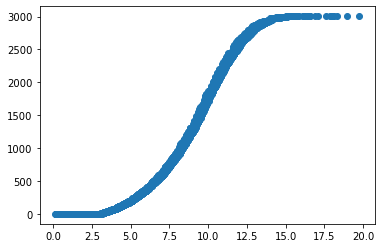

In [8]:
plt.scatter(df["WindSpeed"],df["Power"])

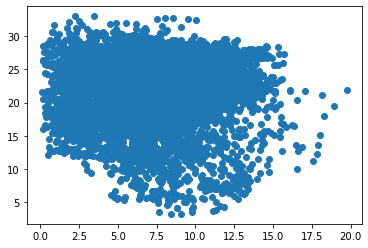

In [9]:
plt.scatter(df["WindSpeed"],df["Temp"])

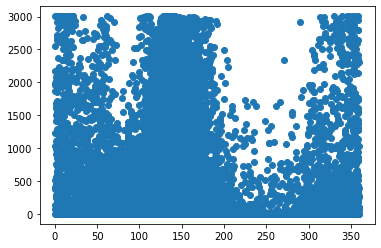

In [10]:
plt.scatter(df["WindDirection"],df["Power"]);

In [11]:
df.head()

,Time stamp,Power,WindSpeed,WindDirection,Pressure,Temp
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [ ]:
df.rename(columns = {'Power':'', 'odi':'ODI',
                              't20':'T20'}, inplace = True)

In [12]:
x = df.drop(columns=['Time stamp', 'Power'])
y = df['Power']
x.head()
x.values

array([[  9.926   , 128.      ,   1.00048 ,  18.263   ],
       [  9.273   , 135.      ,   0.99979 ,  18.363   ],
       [  8.66    , 142.      ,   0.999592,  18.663   ],
       ...,
       [  9.224   , 117.      ,   0.998408,  18.463   ],
       [  8.799   , 116.      ,   0.998013,  18.063   ],
       [  9.748   , 121.      ,   1.00038 ,  18.163   ]])

In [13]:
y.head()

0    1766.64
1    1433.83
2    1167.23
3    1524.59
4    1384.28
Name: Power, dtype: float64

In [14]:
y.values

array([1766.64, 1433.83, 1167.23, ..., 1405.71, 1221.36, 1676.77])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6132, 4)
(2628, 4)
(6132,)
(2628,)


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(x_test)
y_pred

array([  78.79405159,  892.33052725,  320.37765171, ..., 1071.97232039,
        403.66681978, 2802.62567823])

In [18]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_pred, y_test)

In [19]:
print(accuracy*100)

90.50179511045324


In [20]:
#Saving the model
import pickle

In [21]:
pickle.dump(lr, open('model0.pkl','wb'))

In [22]:
#verify
model = pickle.load(open('model0.pkl', 'rb'))
print(model.predict([[9.926,128,1,18.263]]))

[1629.77085744]


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
!pip install ibm_watson_machine_learning

In [25]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
        "url":"https://us-south.ml.cloud.ibm.com",
        "apikey":"VRPKD1qVgUgqtLpDzESBUnBSykdvOGmUNou5Z065rfbq" 
}
client = APIClient(wml_credentials)

In [26]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [27]:
space_uid = guid_from_space_name(client,'Model')
print("Space UID = " + space_uid)

Space UID = 09ab4edc-4985-40eb-9d42-a83613ec6d26


In [28]:
client.set.default_space(space_uid)

'SUCCESS'

In [29]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [30]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [31]:
MODEL_NAME = 'WindTurbine'
DEPLOYMENT_NAME = 'turbine_deploy'
DEMO_MODEL = lr

In [32]:
#Setup Model Meta:
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME,
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
        }

In [33]:
model_details = client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
)

In [34]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Power',
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'WindSpeed', 'type': 'float64'},
      {'name': 'WindDirection', 'type': 'int64'},
      {'name': 'Pressure', 'type': 'float64'},
      {'name': 'Temp', 'type': 'float64'}],
     'id': '1',
     'type': 'DataFrame'},
    'type': 's3'}],
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-06-02T13:46:58.345Z',
  'id': 'b39efc12-cf0a-4b00-989f-c1b513afb418',
  'modified_at': '2022-06-02T13:47:01.188Z',
  'name': 'WindTurbine',
  'owner': 'IBMid-663003IA26',
  'resource_key': '51bcef05-5176-4c82-b553-e88fd62768b2',
  'space_id': '09ab4edc-4985-40eb-9d42-a83613ec6d26'},
 

In [35]:
model_id = client.repository.get_model_id(model_details)

In [36]:
model_id

'b39efc12-cf0a-4b00-989f-c1b513afb418'

In [37]:
#Set Meta
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [38]:
#Deploy
deployment = client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'b39efc12-cf0a-4b00-989f-c1b513afb418' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='dea1763b-c81e-4801-a4f3-64816606577b'
------------------------------------------------------------------------------------------------


